# Analítica computacional para la toma de decisiones

Departamento de Ingeniería Industrial

Universidad de los Andes

## Exploración de datos en python

### Importar Libraries

In [49]:
pip install numpy scipy pandas matplotlib seaborn


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: /usr/local/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importar Dataset

In [51]:
df = pd.read_csv('/Users/saragomezgonzalez/Desktop/Escritorio - Sara’s MacBook Pro/SARA GOMEZ/OCTAVO SEMESTRE/ANALITICA/TALLER 1/BikePrices.csv')


In [52]:
df.shape

(1061, 8)

In [53]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [54]:
df["Brand"].unique()

array(['TVS', 'Bajaj', 'Yo', 'Honda', 'Mahindra', 'Hero', 'Yamaha',
       'Suzuki', 'Activa', 'Vespa', 'Royal', 'Benelli', 'KTM', 'UM',
       'Kawasaki', 'Hyosung', 'BMW', 'Harley', 'Jawa', 'Aprilia'],
      dtype=object)

In [55]:
df.groupby(["Brand"]).count()

,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
Brand,,,,,,,
Activa,3,3,3,3,3,3,3
Aprilia,2,2,2,2,2,2,0
BMW,1,1,1,1,1,1,1
Bajaj,260,260,260,260,260,260,143
Benelli,1,1,1,1,1,1,1
Harley,2,2,2,2,2,2,2
Hero,232,232,232,232,232,232,108
Honda,204,204,204,204,204,204,170
Hyosung,1,1,1,1,1,1,1


In [56]:
df["Brand"].value_counts()

Brand
Bajaj       260
Hero        232
Honda       204
Royal       109
Yamaha      102
TVS          69
Suzuki       30
KTM          24
Mahindra      6
Vespa         4
Kawasaki      4
Activa        3
UM            3
Jawa          3
Harley        2
Aprilia       2
Yo            1
Benelli       1
Hyosung       1
BMW           1
Name: count, dtype: int64

In [57]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [58]:
# número de clientes perdido y no perdidosn
counts = df.Brand.value_counts()
perc_churn = (counts.iloc[1] / (counts.iloc[0] + counts.iloc[1])) * 100
print(f'Churn Rate = {perc_churn:.1f}%')

Churn Rate = 47.2%


In [59]:
# número de duplicados
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 6


In [60]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 435


In [61]:
# Tipos de datos en el dataset
types = df.dtypes.value_counts()

print('Number of Features: %d'%(df.shape[1]))
print('Number of Customers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 8
Number of Customers: 1061
Data Types and Frequency in Dataset:
object     4
int64      3
float64    1
Name: count, dtype: int64


## Pre-Processing

In [62]:
# Conversión de características
df['Owner'] = df['Owner'].map({'1st owner': 1, '2nd owner': 0})


In [65]:
catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['float64']).columns

# codificación 
df = pd.get_dummies(df, columns = catcols)
   
print('New Number of Features: %d'%(df.shape[1]))  

New Number of Features: 607


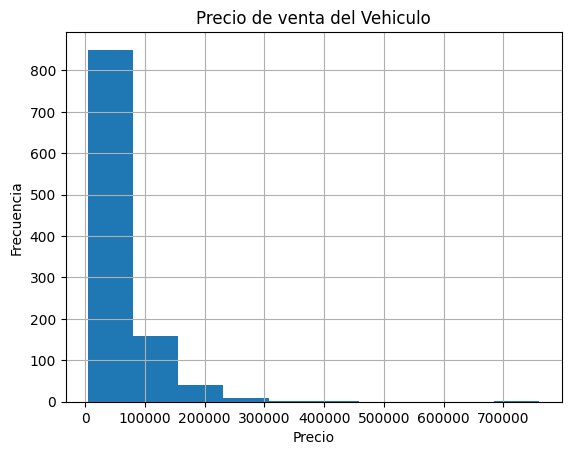

In [64]:
df['Selling_Price'].hist(bins=10)

# Mostrar el histograma
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Precio de venta del Vehiculo')
plt.show()